<a href="https://colab.research.google.com/github/tolgaenginn/ergasia_7/blob/main/ergasia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUESTION 1

Train target distribution:
target
0    3907
1    2944
Name: count, dtype: int64

Test target distribution:
target
0    435
1    327
Name: count, dtype: int64


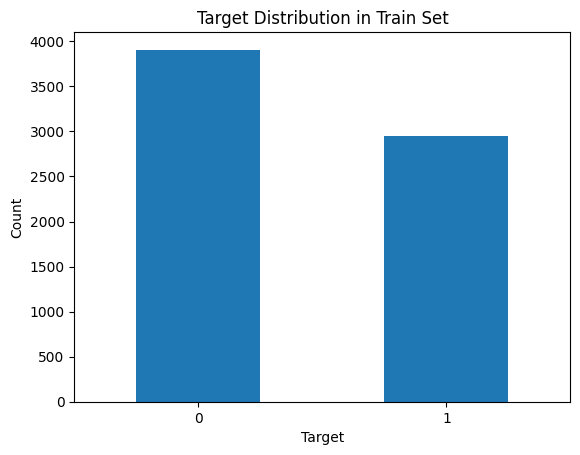

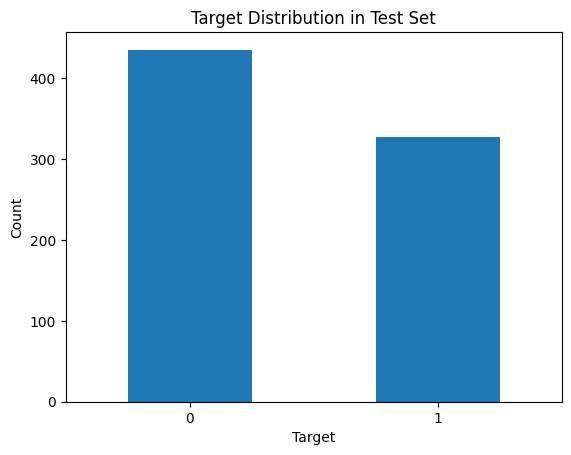

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")

train_df, test_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df["target"],
    random_state=0
)

train_counts = train_df["target"].value_counts().sort_index()
test_counts = test_df["target"].value_counts().sort_index()

print("Train target distribution:")
print(train_counts)
print("\nTest target distribution:")
print(test_counts)

plt.figure()
train_counts.plot(kind="bar")
plt.title("Target Distribution in Train Set")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

plt.figure()
test_counts.plot(kind="bar")
plt.title("Target Distribution in Test Set")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


Data is imbalanced as visible from above. There are significant differences in both sets for target distribution

#QUESTION 2

In [3]:
#Drop unnecessary columns
train_df = train_df.drop(columns=["id", "location"])
test_df = test_df.drop(columns=["id", "location"])

#Fill missing values
train_df = train_df.fillna("null")
test_df = test_df.fillna("null")

#Merge
train_df["inputs"] = train_df["keyword"] + " " + train_df["text"]
test_df["inputs"] = test_df["keyword"] + " " + test_df["text"]

#Check
print(train_df.head())
print("\nColumns:", train_df.columns)


        keyword                                               text  target  \
6669     threat  Meek Mill responds to DrakeÛªs OVO Fest set w...       1   
3940      flood  survived the plague\nfloated the flood\njust p...       0   
7217    weapons  #Kick Hendrixonfire  @'=BLACKCATS= | BIG NOOB ...       0   
2234     deluge  Vince McMahon once again a billionaire: I reme...       0   
4233  hazardous  Is it possible to sneak into a hospital so I c...       0   

                                                 inputs  
6669  threat Meek Mill responds to DrakeÛªs OVO Fes...  
3940  flood survived the plague\nfloated the flood\n...  
7217  weapons #Kick Hendrixonfire  @'=BLACKCATS= | B...  
2234  deluge Vince McMahon once again a billionaire:...  
4233  hazardous Is it possible to sneak into a hospi...  

Columns: Index(['keyword', 'text', 'target', 'inputs'], dtype='object')


#QUESTION 3

In [4]:
import re
import string

# remove URLs
def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", text)

# remove HTML tags
def remove_html(text):
    return re.sub(r"<.*?>", "", text)

# remove emojis and non-ASCII
def remove_emojis(text):
    return text.encode("ascii", "ignore").decode("ascii")

# remove punctuation and special characters
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def clean_text(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_emojis(text)
    text = remove_punctuation(text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_df["inputs"] = train_df["inputs"].apply(clean_text)
test_df["inputs"] = test_df["inputs"].apply(clean_text)

print(train_df["inputs"].head())


6669    threat meek mill responds to drakes ovo fest s...
3940    flood survived the plague floated the flood ju...
7217    weapons kick hendrixonfire blackcats big noob ...
2234    deluge vince mcmahon once again a billionaire ...
4233    hazardous is it possible to sneak into a hospi...
Name: inputs, dtype: object


**URL removal:** Removes hyperlinks. these are meaninglrss.

**HTML tag removal:** in scraped text the html elements may appear. unnecessary.

**Emoji and unicode removal:** These arent even characters.

**Punctuation removal:** Word tokens are important. no need for punctuations.


#QUESTION 4

In [5]:
import numpy as np

X_train = train_df["inputs"].values
y_train = train_df["target"].values

X_test = test_df["inputs"].values
y_test = test_df["target"].values

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6851,)
y_train shape: (6851,)
X_test shape: (762,)
y_test shape: (762,)


#QUESTION 5

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (6851, 5000)
TF-IDF test shape: (762, 5000)


#QUESTION 6

In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_linear = LinearSVC(random_state=0)
svm_linear.fit(X_train_tfidf, y_train)

y_train_pred = svm_linear.predict(X_train_tfidf)
y_test_pred = svm_linear.predict(X_test_tfidf)

# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train Metrics")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1-score : {train_f1:.4f}")

print("\nTest Metrics")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-score : {test_f1:.4f}")


Train Metrics
Accuracy : 0.9321
Precision: 0.9552
Recall   : 0.8835
F1-score : 0.9179

Test Metrics
Accuracy : 0.7966
Precision: 0.7848
Recall   : 0.7248
F1-score : 0.7536


Recall is the most important metric here.

Missing a true disaster (false negative) is more critical than flagging a nondisaster tweet incorrectly (false positive).

#QUESTION 7

In [8]:
#APPLY PCA
from sklearn.decomposition import PCA

X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

pca = PCA(n_components=0.95, random_state=0)

X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

print("Original TF-IDF shape:", X_train_dense.shape)
print("After PCA shape:", X_train_pca.shape)

#LINEAR SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linear_svc_pca = LinearSVC(random_state=0)
linear_svc_pca.fit(X_train_pca, y_train)

y_test_pred_linear_pca = linear_svc_pca.predict(X_test_pca)

linear_pca_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_linear_pca),
    "Precision": precision_score(y_test, y_test_pred_linear_pca),
    "Recall": recall_score(y_test, y_test_pred_linear_pca),
    "F1": f1_score(y_test, y_test_pred_linear_pca)
}

print("LinearSVC + PCA metrics:", linear_pca_metrics)

#SVC WITH RBF
from sklearn.svm import SVC

svc_rbf = SVC(kernel="rbf", random_state=0)
svc_rbf.fit(X_train_pca, y_train)

y_test_pred_rbf = svc_rbf.predict(X_test_pca)

rbf_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_rbf),
    "Precision": precision_score(y_test, y_test_pred_rbf),
    "Recall": recall_score(y_test, y_test_pred_rbf),
    "F1": f1_score(y_test, y_test_pred_rbf)
}

print("RBF SVC + PCA metrics:", rbf_metrics)


Original TF-IDF shape: (6851, 5000)
After PCA shape: (6851, 2493)
LinearSVC + PCA metrics: {'Accuracy': 0.8136482939632546, 'Precision': 0.8032786885245902, 'Recall': 0.7492354740061162, 'F1': 0.7753164556962026}
RBF SVC + PCA metrics: {'Accuracy': 0.821522309711286, 'Precision': 0.8304498269896193, 'Recall': 0.7339449541284404, 'F1': 0.7792207792207793}


RBF SVC yields better results when it comes to accuracy

#QUESTION 8

In [9]:
# SVC with RBF and gamma='auto'
svc_rbf_auto = SVC(kernel="rbf", gamma="auto", random_state=0)
svc_rbf_auto.fit(X_train_pca, y_train)

y_test_pred_rbf_auto = svc_rbf_auto.predict(X_test_pca)

rbf_auto_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_rbf_auto),
    "Precision": precision_score(y_test, y_test_pred_rbf_auto),
    "Recall": recall_score(y_test, y_test_pred_rbf_auto),
    "F1": f1_score(y_test, y_test_pred_rbf_auto)
}

print("RBF SVC (gamma=auto) + PCA metrics:", rbf_auto_metrics)

#GATHER ALL MODELS
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "LinearSVC (no PCA)",
        "LinearSVC + PCA",
        "RBF SVC + PCA (scale)",
        "RBF SVC + PCA (auto)"
    ],
    "Accuracy": [
        test_accuracy,
        linear_pca_metrics["Accuracy"],
        rbf_metrics["Accuracy"],
        rbf_auto_metrics["Accuracy"]
    ],
    "Precision": [
        test_precision,
        linear_pca_metrics["Precision"],
        rbf_metrics["Precision"],
        rbf_auto_metrics["Precision"]
    ],
    "Recall": [
        test_recall,
        linear_pca_metrics["Recall"],
        rbf_metrics["Recall"],
        rbf_auto_metrics["Recall"]
    ],
    "F1": [
        test_f1,
        linear_pca_metrics["F1"],
        rbf_metrics["F1"],
        rbf_auto_metrics["F1"]
    ]
})

print(results)



RBF SVC (gamma=auto) + PCA metrics: {'Accuracy': 0.5708661417322834, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}
                   Model  Accuracy  Precision    Recall        F1
0     LinearSVC (no PCA)  0.796588   0.784768  0.724771  0.753577
1        LinearSVC + PCA  0.813648   0.803279  0.749235  0.775316
2  RBF SVC + PCA (scale)  0.821522   0.830450  0.733945  0.779221
3   RBF SVC + PCA (auto)  0.570866   0.000000  0.000000  0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#QUESTION 9

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_nb = X_train_tfidf.toarray()
X_test_nb = X_test_tfidf.toarray()

# Train Gaussian
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train)

y_train_pred_nb = gnb.predict(X_train_nb)
y_test_pred_nb = gnb.predict(X_test_nb)

# Metrics
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
train_precision_nb = precision_score(y_train, y_train_pred_nb)
train_recall_nb = recall_score(y_train, y_train_pred_nb)
train_f1_nb = f1_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb)
test_recall_nb = recall_score(y_test, y_test_pred_nb)
test_f1_nb = f1_score(y_test, y_test_pred_nb)

print("Gaussian Naive Bayes – TRAIN METRICS")
print(f"Accuracy : {train_accuracy_nb:.4f}")
print(f"Precision: {train_precision_nb:.4f}")
print(f"Recall   : {train_recall_nb:.4f}")
print(f"F1-score : {train_f1_nb:.4f}")
print("\nGaussian Naive Bayes – TEST METRICS")
print(f"Accuracy : {test_accuracy_nb:.4f}")
print(f"Precision: {test_precision_nb:.4f}")
print(f"Recall   : {test_recall_nb:.4f}")
print(f"F1-score : {test_f1_nb:.4f}")


Gaussian Naive Bayes – TRAIN METRICS
Accuracy : 0.7808
Precision: 0.6657
Recall   : 0.9840
F1-score : 0.7941

Gaussian Naive Bayes – TEST METRICS
Accuracy : 0.6509
Precision: 0.5609
Recall   : 0.8593
F1-score : 0.6787
